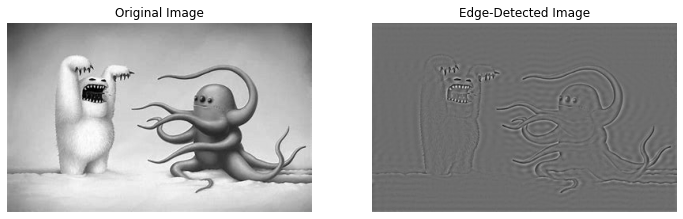

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image and convert to grayscale
image = cv2.imread('kkk.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Fast Fourier Transform (FFT)
fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_image)

# Step 3: Design a High-Pass Filter
def high_pass_filter(size, cutoff):
    rows, cols = size
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0
    return mask

cutoff_frequency = 30  # Adjust this parameter as needed
high_pass_mask = high_pass_filter(image.shape, cutoff_frequency)

# Step 4: Apply the Filter
filtered_fft = fft_shifted * high_pass_mask

# Step 5: Inverse Fourier Transform
filtered_image = np.fft.ifftshift(filtered_fft)
restored_image = np.fft.ifft2(filtered_image).real

# Step 6: Comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title('Edge-Detected Image')
plt.axis('off')

plt.show()
